In [40]:
import pandas as pd

In [41]:
import os
import pandas as pd
import re

def read_and_concatenate_files_with_labels_and_user(folder_paths,
     column_names):
    # Initialize an empty DataFrame
    result_df = pd.DataFrame(columns=column_names + ['Label', 
                    'User'])

    # Iterate through folder paths
    for folder_label, folder_path in zip(['Reading',
                     'Speaking', 'Watching'], 
                     folder_paths):
        # Initialize an empty list to store DataFrames
        dfs = []

        # Get a sorted list of files in the folder
        files_to_process = sorted([file_name for 
    file_name in os.listdir(folder_path) 
    if file_name.endswith('.csv')])

        # Iterate through sorted files in the folder
        for file_name in files_to_process:
            file_path = os.path.join(folder_path, file_name)
            
            # Read the CSV file without column names and concatenate rows
            df = pd.read_csv(file_path, header=None, 
                             names=column_names)
            
            # Extract numerical user information from 
            #the file name using regular expression
            user_match = re.search(r'(\d+)', file_name)
            user_info = int(user_match.group(1)) if \
            user_match else None
            
            # Add 'Label' and 'User' columns
            df['Label'] = folder_label
            df['User'] = user_info
            dfs.append(df)

            # Print statement for debugging
            #print(f"Processed file: {file_name}, 
            #User: {user_info}, Label: {folder_label}")

        # Concatenate the list of DataFrames vertically
        result_df = pd.concat([result_df, pd.concat(dfs, 
                    ignore_index=True)], ignore_index=True)

    return result_df

# Example usage:
folder_paths = ['Data/Reading', 
    'Data/Speaking', 'Data/Watching']
column_names = ['EEG1', 'EEG2', 'Acc_X', 'Acc_Y', 'Acc_Z']

result_dataframe = read_and_concatenate_files_with_labels_and_user(folder_paths,
                 column_names)

# Print the unique values in the "User" column
#print(result_dataframe['User'].unique())

# Display the resulting DataFrame
print(result_dataframe)


              EEG1        EEG2       Acc_X       Acc_Y       Acc_Z     Label  \
0       842.229919  847.164856 -656.251038  789.063721  136.718964   Reading   
1       845.519897  853.744812 -660.157288  792.969971  136.718964   Reading   
2       847.164856  858.679748 -656.251038  792.969971  136.718964   Reading   
3       843.874939  852.099793 -656.251038  792.969971  140.625214   Reading   
4       847.164856  857.034729 -656.251038  792.969971  136.718964   Reading   
...            ...         ...         ...         ...         ...       ...   
104475  847.164856  857.034729 -703.126099  750.001160  136.718964  Watching   
104476  875.129517  837.294983 -703.126099  750.001160  136.718964  Watching   
104477  852.099793  837.294983 -703.126099  750.001160  136.718964  Watching   
104478  832.360046  870.194580 -707.032349  746.094910  132.812714  Watching   
104479  843.874939  843.874939 -703.126099  746.094910  136.718964  Watching   

       User  
0         1  
1         1

In [42]:
User = result_dataframe['User']


In [43]:
# Separate the data into features (X) and target variable (y)
X = result_dataframe[['EEG1', 'EEG2']]  # Features for EEG1 and EEG2
y = result_dataframe['Label']  # Target variable

# Filter data for User 1
X_test = X[User == 1]
y_test = y[User == 1]

# Filter data for training (excluding User 1)
X_train = X[User != 1]
y_train = y[User != 1]

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train: " ,y_train.shape)
print("y_test: ", y_test.shape)

X_train shape: (93537, 2)
X_test shape: (10943, 2)
y_train:  (93537,)
y_test:  (10943,)


In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

encoder = OneHotEncoder(sparse_output=False)


y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = encoder.transform(y_test.values.reshape(-1, 1))
X_train = X_train.values
X_test = X_test.values



In [45]:
# Function to create sliding windows
import numpy as np
def create_sliding_windows(data, window_size):
    windows = []
    for i in range(len(data) - window_size + 1):
        windows.append(data[i:i+window_size])
    return np.array(windows)

In [46]:
window_size=500
X_train_windows = create_sliding_windows(X_train, window_size=window_size)
X_test_windows = create_sliding_windows(X_test, window_size=window_size)
y_train_windows = create_sliding_windows(y_train, window_size=window_size)
y_test_windows = create_sliding_windows(y_test, window_size=window_size)
y_train_flat = y_train_windows[:, -1, :]
y_test_flat = y_test_windows[:, -1, :]

mean_values = X_train.mean(axis=(0, 1))
std_values = X_train.std(axis=(0, 1))
# Compute min and max values from the training data
min_values = X_train.min(axis=(0, 1))
max_values = X_train.max(axis=(0, 1))
X_train_windows = (X_train_windows - min_values) / (max_values - min_values)
X_test_windows = (X_test_windows - min_values) / (max_values - min_values)





Epoch 1/50
2908/2908 [==============================] - 77s 26ms/step - loss: 0.1229 - accuracy: 0.9662 - val_loss: 1.6634 - val_accuracy: 0.6774
Epoch 2/50
2908/2908 [==============================] - 76s 26ms/step - loss: 0.0284 - accuracy: 0.9931 - val_loss: 2.8693 - val_accuracy: 0.5602
Epoch 3/50
2908/2908 [==============================] - 83s 29ms/step - loss: 0.0209 - accuracy: 0.9946 - val_loss: 1.9187 - val_accuracy: 0.6675
Epoch 4/50
2908/2908 [==============================] - 83s 29ms/step - loss: 0.0165 - accuracy: 0.9959 - val_loss: 2.8851 - val_accuracy: 0.5177
Epoch 5/50
2908/2908 [==============================] - 78s 27ms/step - loss: 0.0117 - accuracy: 0.9972 - val_loss: 3.7589 - val_accuracy: 0.4879
Epoch 6/50
2908/2908 [==============================] - 79s 27ms/step - loss: 0.0106 - accuracy: 0.9976 - val_loss: 3.5135 - val_accuracy: 0.5637
Epoch 7/50
2908/2908 [==============================] - 79s 27ms/step - loss: 0.0115 - accuracy: 0.9974 - val_loss: 1.9484 -

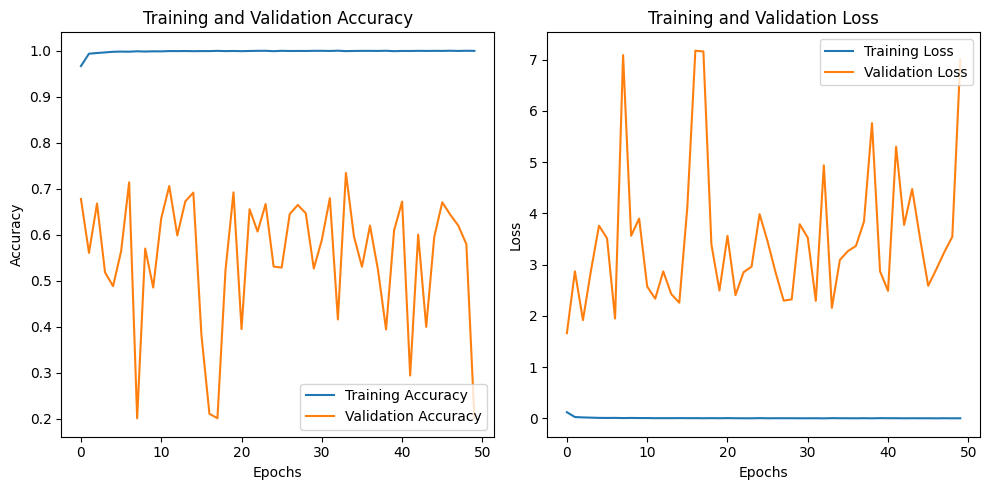

In [47]:
import tensorflow as tf
from tensorflow import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, \
Flatten, Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


# Assuming 'X' is your input data of shape 
#(1044, 100, 6) and 'y' is your corresponding labels
train_steps_per_epoch = len(X_train_windows)
val_steps_per_epoch  = len(X_test_windows)
# Define the CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, \
MaxPooling1D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)




model = Sequential([
    Conv1D(filters=32, kernel_size=4, activation='relu',
    strides=1,
            input_shape=(X_train_windows.shape[1],
                          X_train_windows.shape[2])),
                          BatchNormalization(),
 Conv1D(filters=64, kernel_size=8,strides=4, activation='relu'),
    MaxPooling1D(pool_size=16, strides = 2, padding='valid'),
    Flatten(),
    Dense(512, activation='tanh'),
    Dropout(0.4),
   Dense(128, activation='tanh'),
    Dropout(0.4),
    
    Dense(32, activation = 'tanh',
           kernel_regularizer=regularizers.l2(0.001)),
    Dense(3, activation='softmax')
])







#early_stopping = EarlyStopping(monitor='val_loss',  
#                                restore_best_weights=True)


# Compile the model

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.CategoricalCrossentropy(),
 metrics=['accuracy'])

# Train the model

history = model.fit(X_train_windows, y_train_flat, 
                    epochs=50,
                    validation_data=(X_test_windows, y_test_flat)  
                  
                  )
model.save('model.keras')


#   steps_per_epoch=train_steps_per_epoch,

#  validation_steps=val_steps_per_epoch



# Accessing the history of training
training_accuracy = history.history.get('accuracy') \
    or history.history.get('acc')
training_loss = history.history['loss']
validation_accuracy = history.history.get('val_accuracy')\
or history.history.get('val_acc')
validation_loss = history.history.get('val_loss') \
or history.history.get('validation_loss')

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
if training_accuracy:
    plt.plot(training_accuracy, label='Training Accuracy')
if validation_accuracy:
    plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
if validation_loss:
    plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

327/327 [==============================] - 1s 4ms/step


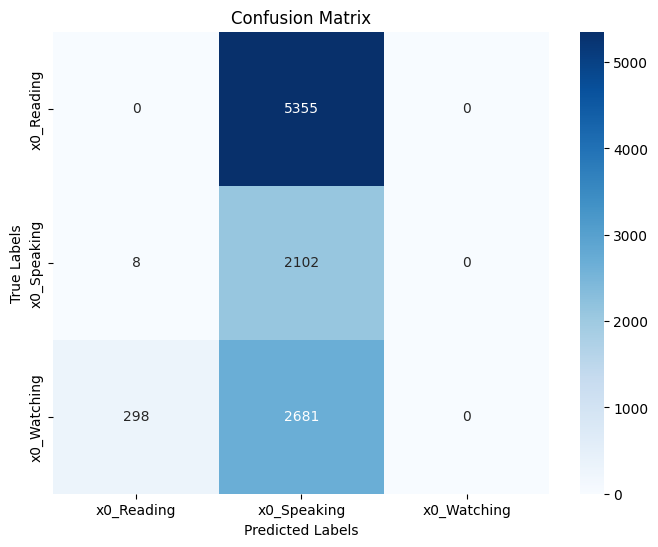

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5355
           1       0.21      1.00      0.34      2110
           2       0.00      0.00      0.00      2979

    accuracy                           0.20     10444
   macro avg       0.07      0.33      0.11     10444
weighted avg       0.04      0.20      0.07     10444



/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_windows)

# Convert one-hot encoded predictions back to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test_flat, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.get_feature_names_out(),
            yticklabels=encoder.get_feature_names_out())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels))


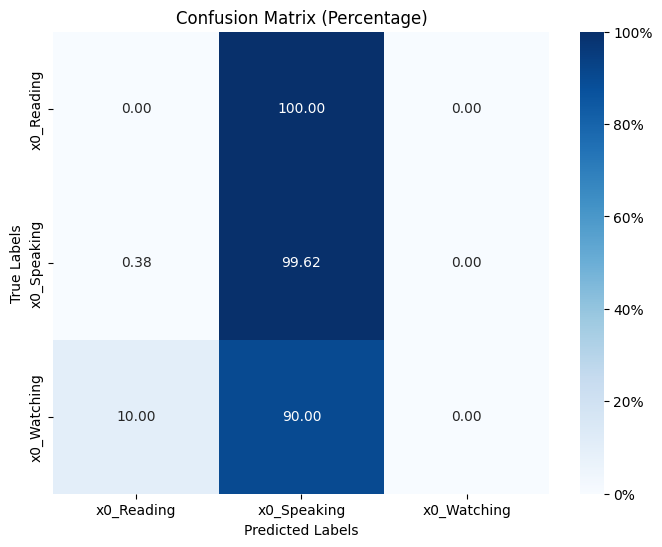

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      5355
           1       0.21      1.00      0.34      2110
           2       0.00      0.00      0.00      2979

    accuracy                           0.20     10444
   macro avg       0.07      0.33      0.11     10444
weighted avg       0.04      0.20      0.07     10444



/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/majd/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from matplotlib.ticker import FuncFormatter

# Calculate confusion matrix percentages
cm_percentage = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]) * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=encoder.get_feature_names_out(),
            yticklabels=encoder.get_feature_names_out(),
            cbar_kws={'format': FuncFormatter(lambda x, _: f'{x:.0f}%')})  # Use FuncFormatter for direct formatting
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true_labels, y_pred_labels))


327/327 [==============================] - 1s 4ms/step


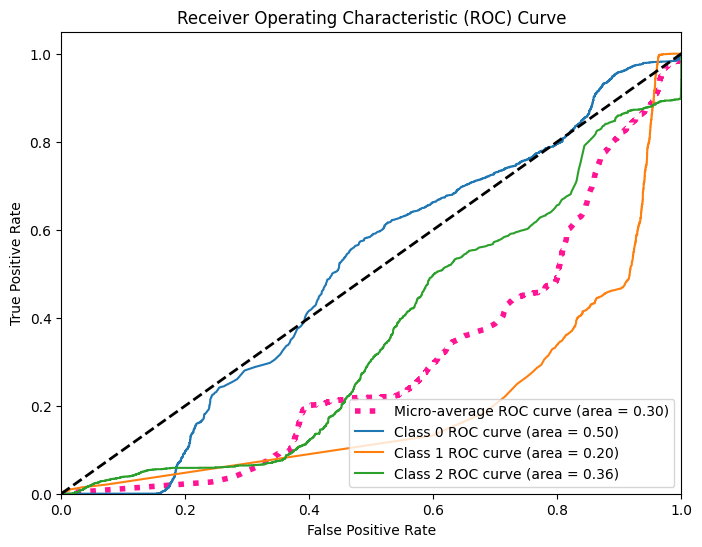

In [50]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_pred_probs = model.predict(X_test_windows)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(encoder.categories_[0].shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y_test_flat[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_flat.ravel(), y_pred_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle=':', linewidth=4)

# Plot individual class ROC curves
for i in range(encoder.categories_[0].shape[0]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
